### INTRDUCTION
Audience reception  towards a  new movie is the standard xmetric of how good a movie is. the reception builds up to sales performanmce for the movie and this is where the production company mainly focuses on; sales and how much money made in this sense. Current market analysis  and audience reception of movies based on genre, features and  the production company can highly inform a  production companies on where to focus on


###  PROBLEM STATEMENT
This project  aim is to deepdive in the market analysis of movies performance on both consumer and producer segments and come up with actonable items on areas to be priotized at production stage for both parties to benefit. After all; Satisfied clients means constant business.


### OBJECTIVES
1. Analyze the trends and patterns in movie performance on both consumer and producer segments; Point ont which Genres are doing weell
2. Identify potential competitors and their strengths to counteract the potential drawbacks of the proposed changes.





### DATA UNDERSTANDING


In [1]:
# loading datasets

import pandas as pd

In [2]:
# popularity= pd.read_csv('data/tmdb.movies.csv', index_col=0)
# popularity.head()

Popularity dataset contains;
1. Movie ID
2. Movie Title; of key is the original Title; which could serve as the primary key
3. Popularity Score; This score is calculated by taking into account a movie's popularity and critical acclaim.
4. Votes; Number of people who have given a vote to the movie.
5. Revenue; Domestic and international box office revenue.
6. Production Budget; The total cost of producing the movie.
7. Domestic Gross; Domestic box office revenue.
8. Worldwide Gross; Worldwide

In [3]:
# movie_info = pd.read_csv('data/rt.movie_info.tsv',sep='\t')
# movie_info.head()

The Movies_Info Dataset contains
1. synopsis of the Movie 
2. Rating; Inicating wheter the movie is rated or not.
3. Director's Name
4. Genre(s)
5. Runtime in Minutes
6. Release Date; boththeatre and DVD date
7. Studio Name in which the Movie is is produced

In [4]:
# reviews = pd.read_csv('data/rt.reviews.tsv',sep='\t',encoding='latin-1')
# reviews.head()

In [5]:
BOM = pd.read_csv('data/bom.movie_gross.csv')
BOM.head()
BOM.isna().sum()
BOM.dropna()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


Bill of Matrials(BOM dataset)
1. Title of the Movie
2. The data set contains Budgeted cost of production to  incurred domestically and internationally.

In [6]:
cost= pd.read_csv('data/tn.movie_budgets.csv')
cost.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


cost dataset contains;
1. The  movie release date
2. Movie title
3. Production Budget; The total cost of producing the movie.
4. Domestic Gross; Domestic cost of producing the movie
5. Worldwide Gross; Worldwide cost of producing the movie


In [7]:
cost = cost.rename(columns={'movie':'title'})
cost.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# merge BOM and cost datasets on thre title column

roi_df = pd.merge(BOM, cost, on='title', how='inner')
roi_df .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1086 non-null   object 
 4   year               1247 non-null   int64  
 5   id                 1247 non-null   int64  
 6   release_date       1247 non-null   object 
 7   production_budget  1247 non-null   object 
 8   domestic_gross_y   1247 non-null   object 
 9   worldwide_gross    1247 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 107.2+ KB


In [9]:
roi_df=roi_df.rename(columns={'domestic_gross_x':'bom_domestic','foreign_gross':'bom_foreign','domestic_gross_y':'domestic_gross'})

In [10]:
#convert  production budget to integers

roi_df['production_budget'] = roi_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)
roi_df['domestic_gross']=roi_df['domestic_gross'].str.replace('$', '').str.replace(',','').astype(int)
roi_df['worldwide_gross']=roi_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)

In [11]:
#check the roi_df for missing values
roi_df.isna().sum()

title                  0
studio                 1
bom_domestic           2
bom_foreign          161
year                   0
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

In [12]:
#drop the missing values
roi_df=roi_df.dropna()
roi_df.isna().sum()

title                0
studio               0
bom_domestic         0
bom_foreign          0
year                 0
id                   0
release_date         0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [13]:
#check the roi_df for duplicates
roi_df.duplicated().sum()

0

In [14]:
import sqlite3
conn = sqlite3.connect('im.db')
# cursor object to execute SQL queries
cur = conn.cursor()
#list of tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())
conn.close

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


<function Connection.close>

In [15]:
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
print(movie_basics.isna().sum())
print("---------------")
print(movie_basics.info())

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


In [16]:
directors= pd.read_sql_query("SELECT * FROM directors", conn)
print(directors.isna().sum())
print(directors.info())

movie_id     0
person_id    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None


In [17]:
movie_ratings= pd.read_sql_query("SELECT * FROM movie_ratings", conn)
print(movie_ratings.isna().sum())
print(movie_ratings.info())

movie_id         0
averagerating    0
numvotes         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [18]:
# persons= pd.read_sql_query("SELECT * FROM persons", conn)
# print(persons.isna().sum())
# print(persons.info())

In [19]:
# principals= pd.read_sql_query("SELECT * FROM principals", conn)
# print(principals.isna().sum())
# print(principals.info())

In [20]:
combined_df = pd.merge(movie_basics, directors, on='movie_id',how='inner')
combined_df = pd.merge(combined_df, movie_ratings, on='movie_id', how='inner')
combined_df.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    17803
genres              1340
person_id              0
averagerating          0
numvotes               0
dtype: int64

In [21]:
combined_df=combined_df.rename(columns={'primary_title':'title'})

In [22]:
#check for duplicated in combined_df
combined_df.duplicated().sum()
combined_df = combined_df.drop_duplicates(subset=['title'])

In [23]:
# add roi gnre column by pulling from combined df based on title
roi_df['genres'] = roi_df['title'].map(combined_df.set_index('title')['genres'])

In [24]:
roi_df.head()

,title,studio,bom_domestic,bom_foreign,year,id,release_date,production_budget,domestic_gross,worldwide_gross,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",200000000,415004880,1068879522,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",160000000,292576195,835524642,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",165000000,238736787,756244673,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",68000000,300531751,706102828,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",170000000,312433331,621156389,"Action,Adventure,Sci-Fi"


In [37]:
# add a column for return on investment  pruction budget less from dosmestic and worldwide gross

roi_df['roi'] =(roi_df['domestic_gross'] + roi_df['worldwide_gross'])-roi_df['production_budget']
roi_df.head()

,title,studio,bom_domestic,bom_foreign,year,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,roi
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",200000000,415004880,1068879522,"Adventure,Animation,Comedy",1283884402
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",160000000,292576195,835524642,"Action,Adventure,Sci-Fi",968100837
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",165000000,238736787,756244673,"Adventure,Animation,Comedy",829981460
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",68000000,300531751,706102828,"Adventure,Drama,Fantasy",938634579
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",170000000,312433331,621156389,"Action,Adventure,Sci-Fi",763589720


## DATA CLEANING

In [25]:
# drop the runtime_minutes, job and characters from the combined_df
combined_df.drop(['runtime_minutes', 'person_id'], axis=1, inplace=True)
combined_df.isna().sum()

movie_id            0
title               0
original_title      0
start_year          0
genres            638
averagerating       0
numvotes            0
dtype: int64

In [26]:
# drop the missing values
combined_df.dropna(inplace=True)
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68648 entries, 0 to 181382
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_id        68648 non-null  object 
 1   title           68648 non-null  object 
 2   original_title  68648 non-null  object 
 3   start_year      68648 non-null  int64  
 4   genres          68648 non-null  object 
 5   averagerating   68648 non-null  float64
 6   numvotes        68648 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.2+ MB
None


In [27]:
#check for duplicates
combined_df.duplicated().sum()
#drop duplicates and check the size of the current df 
combined_df.drop_duplicates(inplace=True)
combined_df.shape

(68648, 7)

In [28]:
combined_df.head()

,movie_id,title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
7,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119


<AxesSubplot:>

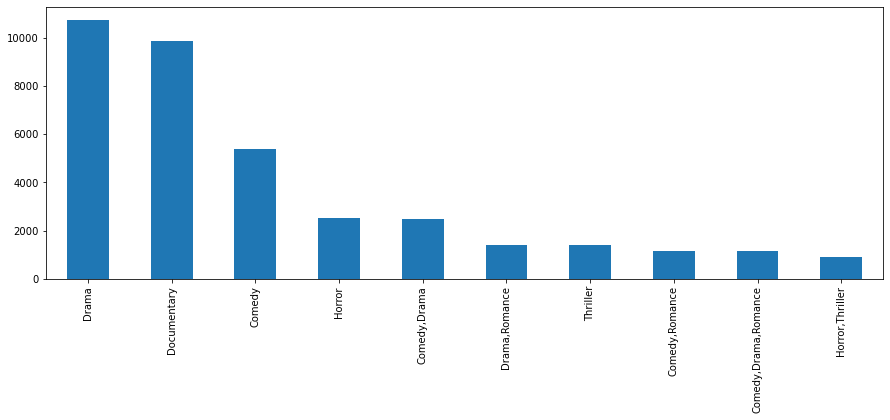

In [40]:
# visualize top 10 common genres
import seaborn  as sns
import matplotlib.pyplot as plt
combined_df['genres'].value_counts().head(10).plot(kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='genres'>

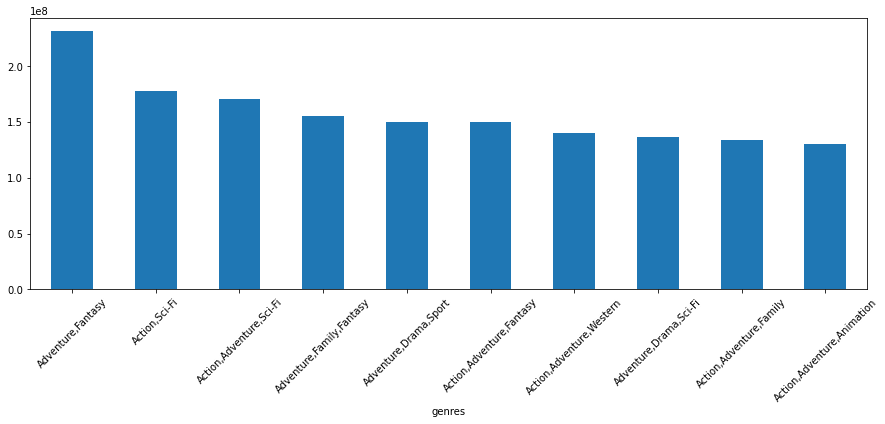

In [30]:
#check the genres with highest production cost
roi_df.groupby('genres')['production_budget'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(15,5), rot=45)

genres
Action,Adventure,Sci-Fi      187165.780488
Adventure,Mystery,Sci-Fi     135042.500000
Action,Fantasy,War           131509.000000
Adventure,Drama,Sci-Fi       110341.277778
Action,Adventure,Fantasy      98518.948980
Biography,Drama,Thriller      88520.666667
Action,Adventure,Thriller     78752.319149
Action,Crime,Sci-Fi           78214.125000
Action,Adventure,Mystery      66149.272727
Adventure,Comedy,Music        53912.000000
Name: numvotes, dtype: float64

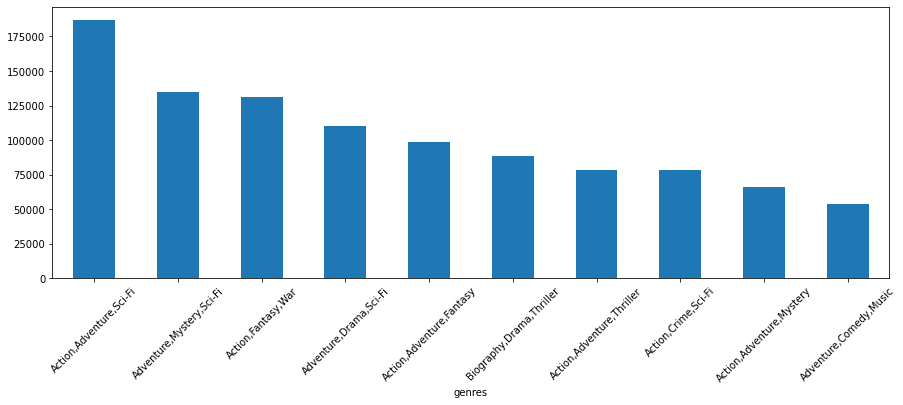

In [ ]:
# visualize to 10 genres where avaerage rating is highest
combined_df.groupby('genres')['numvotes'].mean().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5), rot=45)

<AxesSubplot:xlabel='start_year'>

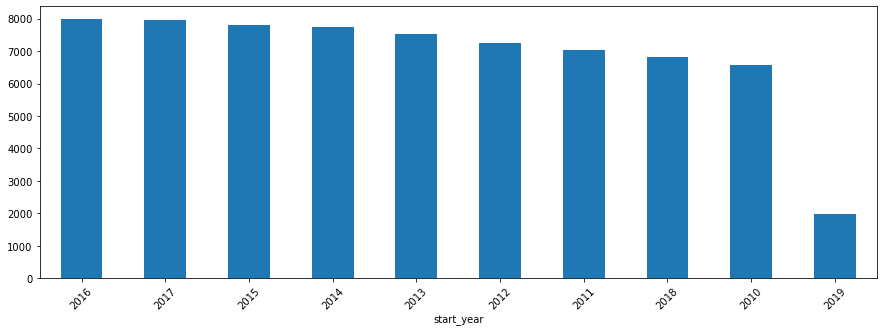

In [32]:
# group the number of movies per year
# indicate the values at the end of the bars

combined_df.groupby('start_year')['movie_id'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=45)
#combined_df.groupby('start_year')['movie_id'].count().sort_values(ascending=False).plot(kind='bar')


genres
Adventure,Drama,Sport         1.523208e+09
Comedy,Mystery                7.609286e+08
Adventure,Drama,Sci-Fi        7.325512e+08
Adventure,Fantasy             6.624354e+08
Action,Adventure,Sci-Fi       6.515288e+08
Animation,Comedy,Family       5.268440e+08
Action,Adventure,Comedy       5.215809e+08
Action,Adventure,Animation    5.138078e+08
Drama,Western                 5.127538e+08
Biography,Drama,Musical       4.770057e+08
Name: roi, dtype: float64

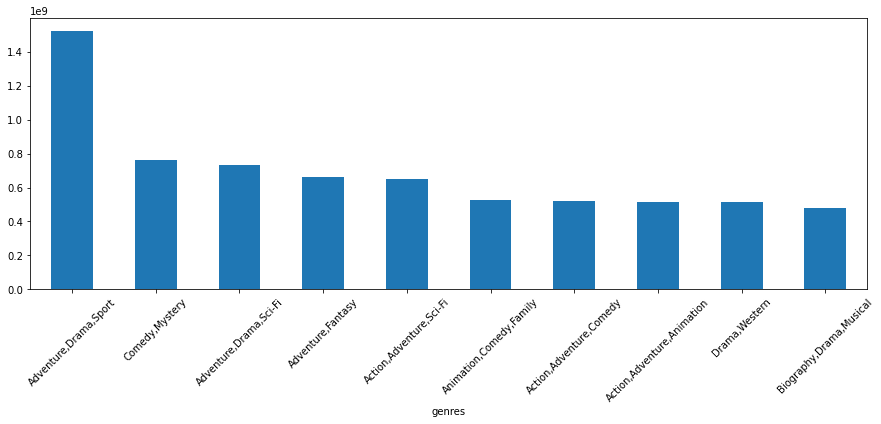

In [42]:
# genres with the highest ROI
roi_df.groupby('genres')['roi'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(15,5), rot=45)
roi_df.groupby('genres')['roi'].mean().sort_values(ascending=False).head(10)

# Summarize observations

- the Top ten genres in production are Drama 10732,Documentary 9856,Come 5365,Horror  2506,Comedy,Drama   2476,Drama,Romance 1396,Thriller 1387,Comedy,Romance 1173,Comedy,Drama,Romance1149,Horror,Thriller 908,
- the most popular or genre in terms of voting is Action,Adventure,Sci-Fi with average votes; 187165.780488
- The highest ROI genres are Adventure,Drama,Sport 1.523208e+09
